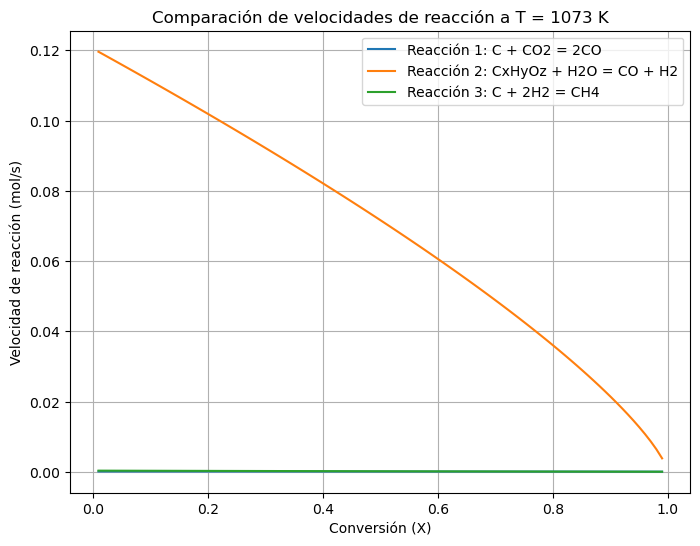

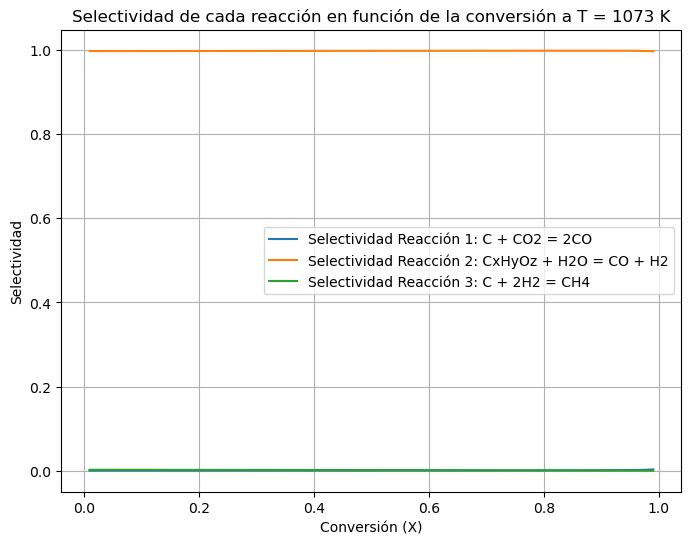

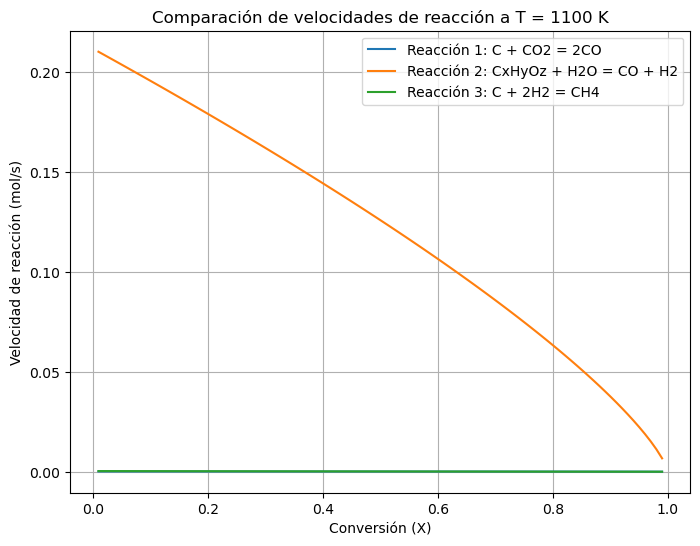

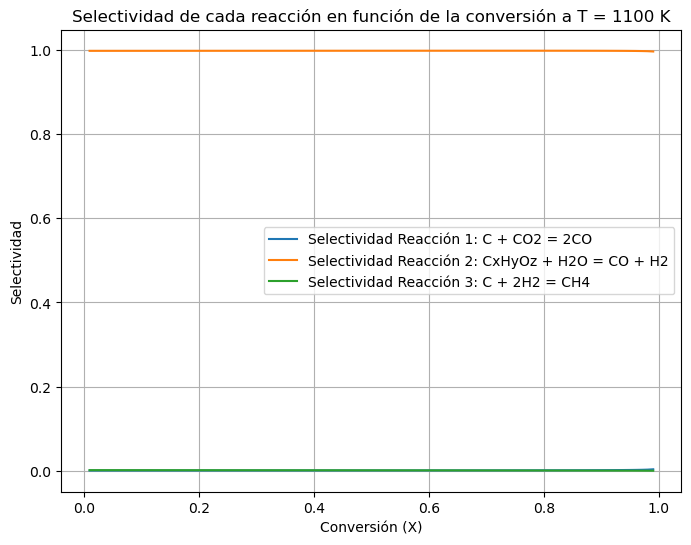

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Constantes globales
R = 8.314  # Constante de gases ideales (J/mol·K)
P = 1.01325  # Presión en bar
X = np.linspace(0.01, 0.99, 100)  # Conversión de 0 a 1

# Parámetros de reacciones (múltiples reacciones en simultáneo)
reactions = {
    "Reacción 1: C + CO2 = 2CO": {
        "A": 3.1e6,  # s^-1 bar^-0.38
        "n": 0.38,
        "Ea": 215e3,  # J/mol
        "P_init": 0.738 / 157.67  # Fracción inicial de CO2
    },
    "Reacción 2: CxHyOz + H2O = CO + H2": {
        "A": 123e6,
        "n": 0.75,
        "Ea": 198e3,
        "P_init": 12.08 / 157.67  # Ejemplo de fracción inicial
    },
    "Reacción 3: C + 2H2 = CH4": {
        "A": 4.189e-3,
        "n": 1.2,
        "Ea": 19210,  # J/mol
        "P_init": 1.2 / 157.67
    },
}

# Flujo volumétrico inicial (en mol/s)
F_A0 = 65 / 3600  # Flujo volumétrico inicial

# Rango de temperaturas a analizar
#temperaturas = np.arange(300, 1300, 100)
temperaturas = [1073, 1100]

# Función para calcular la velocidad de reacción combinada
def total_reaction_rate(reactions, T, X):
    rates = {name: np.zeros_like(X) for name in reactions.keys()}
    for name, params in reactions.items():
        P_current = P * (params["P_init"] * (1 - X)) * 0.08314 * T  # Presión parcial
        k = params["A"] * np.exp(-params["Ea"] / (R * T))  # Constante de velocidad
        rates[name] = k * (P_current ** params["n"])  # Velocidad de reacción
    return rates

# Bucle para analizar diferentes temperaturas
for T in temperaturas:
    reaction_rates = total_reaction_rate(reactions, T, X)
    
    # Determinar reacción predominante en cada punto de conversión
    dominant_reaction = np.argmax(np.array(list(reaction_rates.values())), axis=0)

    # Calcular la selectividad de cada reacción
    total_rate = sum(reaction_rates.values())
    selectivity = {name: rate / total_rate for name, rate in reaction_rates.items()}

    #uno, dos = reaction_rates.values()

    #print(f'Rendimiento instantaneo (X=0.8):',(uno[80]/dos[80]) * 100, '%')
    #print(f'Rendimiento Global (X=0.8):',  0.8*(6.50 / 3600), '(mol/s)')

    # Graficar velocidades de reacción
    plt.figure(figsize=(8, 6))
    for name, rate in reaction_rates.items():
        plt.plot(X, rate, label=name)
    
    plt.xlabel('Conversión (X)')
    plt.ylabel('Velocidad de reacción (mol/s)')
    plt.title(f'Comparación de velocidades de reacción a T = {T} K')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Graficar selectividad
    plt.figure(figsize=(8, 6))
    for name, sel in selectivity.items():
        plt.plot(X, sel, label=f'Selectividad {name}')

    plt.xlabel('Conversión (X)')
    plt.ylabel('Selectividad')
    plt.title(f'Selectividad de cada reacción en función de la conversión a T = {T} K')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Mostrar tabla con información de la reacción predominante en cada punto
    df = pd.DataFrame({
        'Conversión (X)': X,
        'Reacción Predominante': [list(reactions.keys())[i] for i in dominant_reaction]
    })


<>:47: SyntaxWarning: invalid escape sequence '\c'
<>:47: SyntaxWarning: invalid escape sequence '\c'
C:\Users\sbasa\AppData\Local\Temp\ipykernel_17432\3398337604.py:47: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel("1/r_A ($L\cdot s / mol$)", fontsize=12)


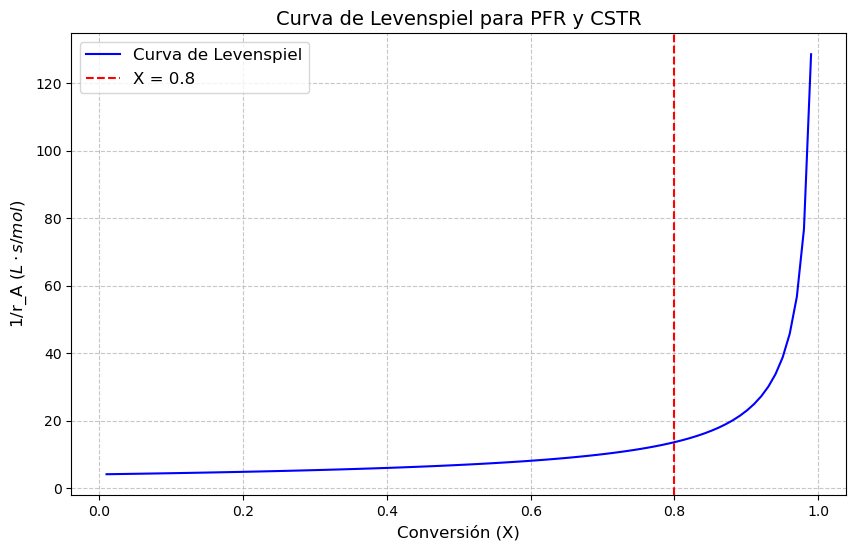

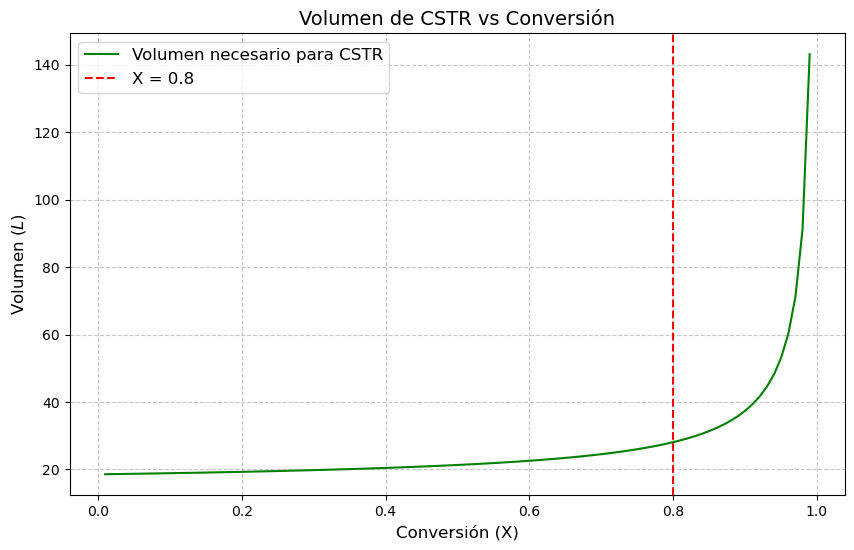

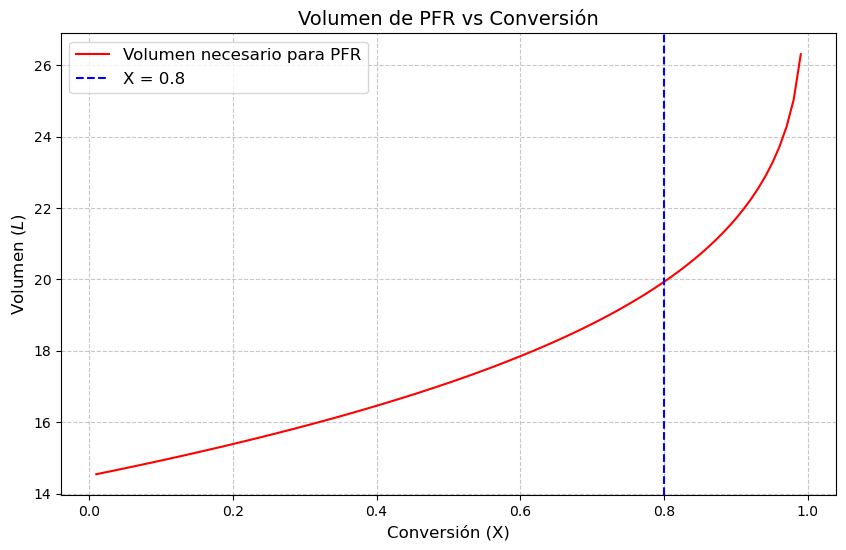

In [1]:
import numpy as np
import matplotlib.pyplot as plt



# Constantes globales
R = 8.314  # Constante de gases ideales (J/mol·K)
T = 1300  # Temperatura en Kelvin
P = 1.0  # Presión en atm
#F_A0 = 157.67 / 3600  # Flujo volumétrico inicial en L/s convertido de L/h
F_A0 = 6.50 / 3600

# Parámetros de la reacción (Reacción genérica)
A = 123e6  # Factor pre-exponencial (s^-1 bar^-n)
Ea = 198e3  # Energía de activación (J/mol)
n = 0.75  # Orden de reacción respecto a presión
P_A0 = 12.08 / 157.6  # Presión parcial inicial de A (bar)

# Conversión y velocidad de reacción
X = np.linspace(0.01, 0.99, 100)

# Cálculo de velocidad de reacción
k = A * np.exp(-Ea / (R * T))  # Constante de velocidad a 1300 K
r_A = k * ((P_A0 * (1 - X)) ** n)  # Velocidad de reacción (mol/L·s)

# Ajustar flujo volumétrico inicial para obtener velocidad en función de volumen
F_A0_molar = F_A0 / 22.4  # Convertir flujo volumétrico a molar (mol/s)

# Curva de Levenspiel (1/r_A vs X)
levenspiel_curve = F_A0_molar / r_A

# Cálculo del volumen necesario para CSTR y PFR para X = 0.8
X_target = 0.8
r_A_target = k * ((P_A0 * (1 - X_target)) ** n)  # Velocidad de reacción a X = 0.8
V_CSTR_target = F_A0_molar / r_A_target  # Volumen CSTR para X = 0.8

# Volumen PFR (integral hasta X = 0.8)
index_target = np.where(X >= X_target)[0][0]
V_PFR_target = np.sum(levenspiel_curve[:index_target] * (X[1] - X[0]))

# Gráfica de la curva de Levenspiel
plt.figure(figsize=(10, 6))
plt.plot(X, levenspiel_curve*1e4, label="Curva de Levenspiel", color="blue")
plt.axvline(X_target, color="red", linestyle="--", label=f"X = {X_target}")
plt.title("Curva de Levenspiel para PFR y CSTR", fontsize=14)
plt.xlabel("Conversión (X)", fontsize=12)
plt.ylabel("1/r_A ($L\cdot s / mol$)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.show()

# Gráfica del volumen de CSTR
plt.figure(figsize=(10, 6))
plt.plot(X, levenspiel_curve*1e4 +14.5, label="Volumen necesario para CSTR", color="green")
plt.axvline(X_target, color="red", linestyle="--", label=f"X = {X_target}")
plt.title("Volumen de CSTR vs Conversión", fontsize=14)
plt.xlabel("Conversión (X)", fontsize=12)
plt.ylabel("Volumen ($L$)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.show()

# Gráfica del volumen de PFR
plt.figure(figsize=(10, 6))
plt.plot(X, (np.cumsum(levenspiel_curve) * (X[1] - X[0]) *1e4)+14.5, label="Volumen necesario para PFR", color="red")
plt.axvline(X_target, color="blue", linestyle="--", label=f"X = {X_target}")
plt.title("Volumen de PFR vs Conversión", fontsize=14)
plt.xlabel("Conversión (X)", fontsize=12)
plt.ylabel("Volumen ($L$)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.show()


<>:44: SyntaxWarning: invalid escape sequence '\c'
<>:44: SyntaxWarning: invalid escape sequence '\c'
C:\Users\sbasa\AppData\Local\Temp\ipykernel_17432\2536382424.py:44: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel("1/r_A ($L\cdot s / mol$)", fontsize=12)


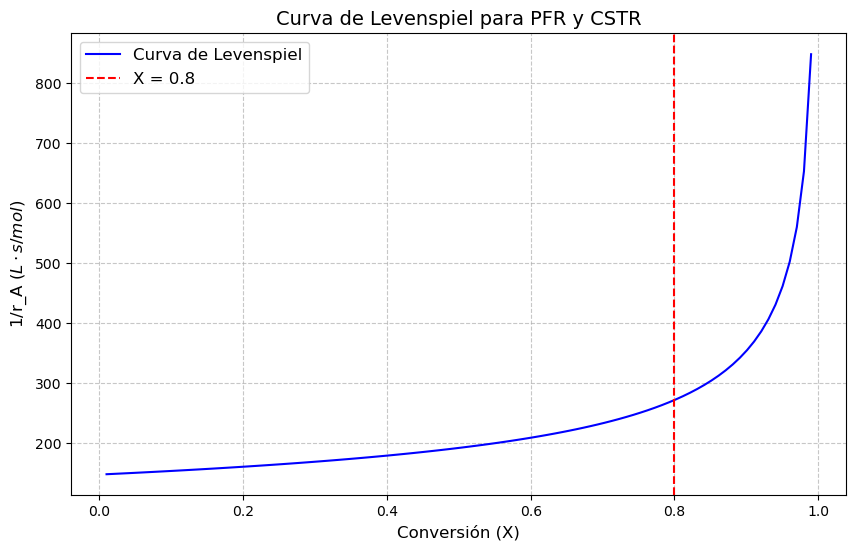

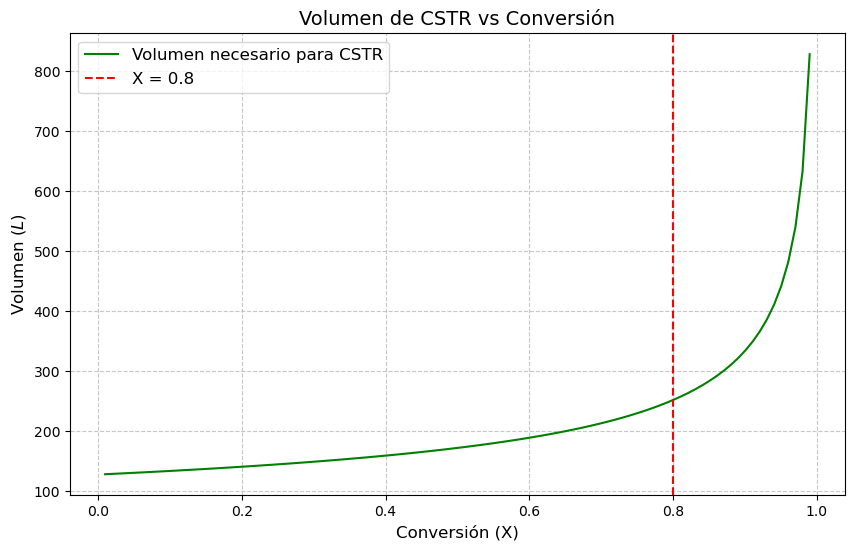

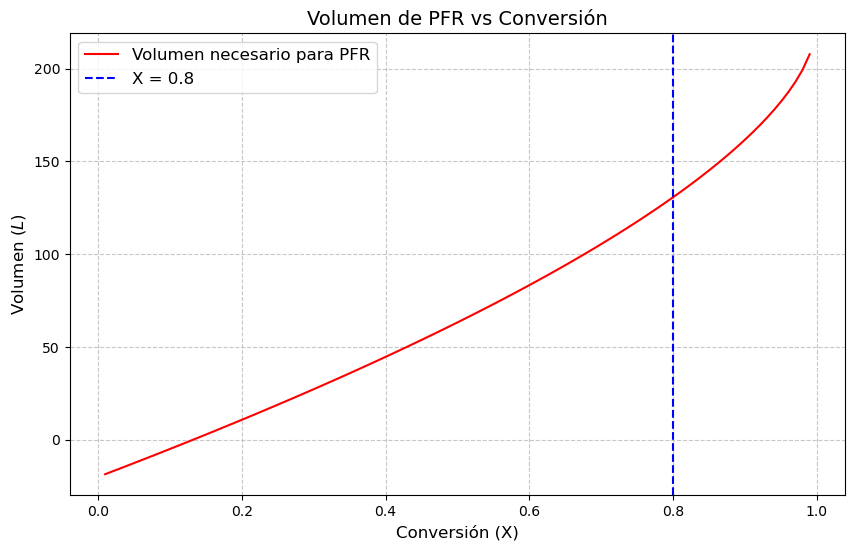

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes globales
R = 8.314  # Constante de gases ideales (J/mol·K)
T = 1300  # Temperatura en Kelvin
P = 1.0  # Presión en atm
F_A0 = 6.50 / 3600

# Parámetros de la reacción (Reacción genérica)
A = 3.1e6  # Factor pre-exponencial (s^-1 bar^-n)
Ea = 215e3  # Energía de activación (J/mol)
n = 0.38  # Orden de reacción respecto a presión
P_A0 = 0.5  # Presión parcial inicial de A (bar)

# Conversión y velocidad de reacción
X = np.linspace(0.01, 0.99, 100)

# Cálculo de velocidad de reacción
k = A * np.exp(-Ea / (R * T))  # Constante de velocidad a 1300 K
r_A = k * ((P_A0 * (1 - X)) ** n)  # Velocidad de reacción (mol/L·s)

# Ajustar flujo volumétrico inicial para obtener velocidad en función de volumen
F_A0_molar = F_A0 / 22.4  # Convertir flujo volumétrico a molar (mol/s)

# Curva de Levenspiel (1/r_A vs X)
levenspiel_curve = F_A0_molar / r_A

# Cálculo del volumen necesario para CSTR y PFR para X = 0.8
X_target = 0.8
r_A_target = k * ((P_A0 * (1 - X_target)) ** n)  # Velocidad de reacción a X = 0.8
V_CSTR_target = F_A0_molar / r_A_target  # Volumen CSTR para X = 0.8

# Volumen PFR (integral hasta X = 0.8)
index_target = np.where(X >= X_target)[0][0]
V_PFR_target = np.sum(levenspiel_curve[:index_target] * (X[1] - X[0]))

# Gráfica de la curva de Levenspiel
plt.figure(figsize=(10, 6))
plt.plot(X, levenspiel_curve*1e4, label="Curva de Levenspiel", color="blue")
plt.axvline(X_target, color="red", linestyle="--", label=f"X = {X_target}")
plt.title("Curva de Levenspiel para PFR y CSTR", fontsize=14)
plt.xlabel("Conversión (X)", fontsize=12)
plt.ylabel("1/r_A ($L\cdot s / mol$)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.show()

# Gráfica del volumen de CSTR
plt.figure(figsize=(10, 6))
plt.plot(X, (levenspiel_curve*1e4 -20), label="Volumen necesario para CSTR", color="green")
plt.axvline(X_target, color="red", linestyle="--", label=f"X = {X_target}")
plt.title("Volumen de CSTR vs Conversión", fontsize=14)
plt.xlabel("Conversión (X)", fontsize=12)
plt.ylabel("Volumen ($L$)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.show()

# Gráfica del volumen de PFR
plt.figure(figsize=(10, 6))
plt.plot(X, (np.cumsum(levenspiel_curve) * (X[1] - X[0]) *1e4) -20 , label="Volumen necesario para PFR", color="red")
plt.axvline(X_target, color="blue", linestyle="--", label=f"X = {X_target}")
plt.title("Volumen de PFR vs Conversión", fontsize=14)
plt.xlabel("Conversión (X)", fontsize=12)
plt.ylabel("Volumen ($L$)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.show()
